In [431]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [432]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [433]:
df=pd.read_csv("/content/drive/MyDrive/datasets/delhivery_data.csv")
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [434]:
df1=df.loc[df['trip_uuid']=='trip-153741093647649320']
df1['od_start_time'].value_counts()

,count
od_start_time,
2018-09-20 03:21:32.418600,5
2018-09-20 04:47:45.236797,5


# **Analyzing the structure of the data**

In [435]:
df.shape

(144867, 24)

In [436]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [438]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


# **Handling missing values**

In [439]:
df.dropna(how='any', inplace=True)
df.reset_index()

,index,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144312,144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144313,144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144314,144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [440]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


# **Converting time columns into pandas datetime**

In [441]:
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  object        
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

# **Merging the rows at segment level**

In [443]:
df['segment_key'] = df['trip_uuid'] + '_' + df['source_center'] + '_' + df['destination_center']

# Step 2: Group by segment_key and aggregate using cumsum
df['segment_actual_time_sum'] = df.groupby('segment_key')['segment_actual_time'].cumsum()
df['segment_osrm_distance_sum'] = df.groupby('segment_key')['segment_osrm_distance'].cumsum()
df['segment_osrm_time_sum'] = df.groupby('segment_key')['segment_osrm_time'].cumsum()

In [444]:
d=df.sort_values(["trip_uuid","cutoff_timestamp"])
d[["trip_uuid","is_cutoff","cutoff_factor","cutoff_timestamp","segment_factor","segment_actual_time","segment_osrm_time","segment_osrm_distance"]]

,trip_uuid,is_cutoff,cutoff_factor,cutoff_timestamp,segment_factor,segment_actual_time,segment_osrm_time,segment_osrm_distance
125001,trip-153671041653548748,False,440,2018-09-12 01:50:28,7.333333,22.0,3.0,5.3898
125000,trip-153671041653548748,True,440,2018-09-12 02:12:31,1.476190,31.0,21.0,25.1845
124999,trip-153671041653548748,True,418,2018-09-12 02:44:28,1.840000,46.0,25.0,32.6154
124998,trip-153671041653548748,True,396,2018-09-12 03:30:32,1.666667,30.0,18.0,26.4425
124997,trip-153671041653548748,True,374,2018-09-12 04:00:33,1.650000,33.0,20.0,28.7030
...,...,...,...,...,...,...,...,...
86471,trip-153861115439069069,True,9,2018-10-04 05:32:33,1.153846,15.0,13.0,14.7197
11571,trip-153861118270144424,False,25,2018-10-04 03:08:31,2.750000,11.0,4.0,4.8117
11570,trip-153861118270144424,True,22,2018-10-04 03:20:29,1.428571,30.0,21.0,23.2367
11573,trip-153861118270144424,False,40,2018-10-04 04:20:33,7.520000,188.0,25.0,28.5437


In [445]:
df.nunique()

,0
data,2
trip_creation_time,14787
route_schedule_uuid,1497
route_type,2
trip_uuid,14787
source_center,1496
source_name,1496
destination_center,1466
destination_name,1466
od_start_time,26223


# **Aggregating at segment level**

In [446]:
subgroup_df = df.groupby('segment_key').agg({
    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
}).reset_index()
subgroup_df

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [447]:
subgroup_df.loc[subgroup_df['trip_uuid']=='trip-153671042288605164']

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0


In [448]:
subgroup_df = subgroup_df.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()

# **Calculating time taken between od_start_time and od_end_time as feature**


In [449]:
#time taken between od_start_time and od_end_time as a feature

subgroup_df['od_time_diff_hour'] = (subgroup_df['od_end_time'] - subgroup_df['od_start_time']).dt.total_seconds() / (60)

In [450]:
df.drop(['od_start_time', 'od_end_time'], axis=1, inplace=True)

# **Merging and aggregating the rows at single trip level**

In [451]:
finalgroup_df=subgroup_df.groupby('trip_uuid').agg({
    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',


    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',


}).reset_index()
finalgroup_df

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


In [452]:
finalgroup_df.describe()

,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
count,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000
mean,529.429025,530.313517,164.090196,356.306012,160.990938,203.887411,353.059174,222.705466,180.511598
std,658.254936,658.415490,305.502982,561.517936,271.459495,370.565564,556.365911,416.846279,314.679279
min,23.000000,23.461468,9.002461,9.000000,6.000000,9.072900,9.000000,9.072900,6.000000
25%,149.000000,149.698496,22.777099,67.000000,29.000000,30.756900,66.000000,32.578850,30.000000
50%,279.000000,279.710750,48.287894,148.000000,60.000000,65.302800,147.000000,69.784200,65.000000
75%,632.000000,633.537697,163.591258,367.000000,168.000000,206.644200,364.000000,216.560600,184.000000
max,7898.000000,7898.551955,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,3523.632400,2564.000000


# **Splitting and extracting features out of destination**

In [453]:
finalgroup_df['destination_name'] =finalgroup_df['destination_name'].str.lower()
finalgroup_df['source_name'] = finalgroup_df['source_name'].str.lower()

def state(x):

    state = x.split('(')[1]
    return state[:-1]

def city(x):

    city = x.split(' (')[0]

    city = city.split('_')[0]
    return city

def place(x):

    x = x.split(' (')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    if len_ == 2:
        return x.split('_')[0]
    return x.split(' ')[0]

def code(x):
    x = x.split(' (')[0]

    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]

    return 'none'

finalgroup_df['destination_state'] = finalgroup_df['destination_name'].apply(lambda x: state(x))
finalgroup_df['destination_city']  = finalgroup_df['destination_name'].apply(lambda x: city(x))
finalgroup_df['destination_place'] = finalgroup_df['destination_name'].apply(lambda x: place(x))
finalgroup_df['destination_code']  = finalgroup_df['destination_name'].apply(lambda x: code(x))

finalgroup_df['source_state'] = finalgroup_df['source_name'].apply(lambda x: state(x))
finalgroup_df['source_city']  = finalgroup_df['source_name'].apply(lambda x: city(x))
finalgroup_df['source_place'] = finalgroup_df['source_name'].apply(lambda x: place(x))
finalgroup_df['source_code']  = finalgroup_df['source_name'].apply(lambda x: code(x))
finalgroup_df[['destination_state', 'destination_city', 'destination_place', 'destination_code','source_state', 'source_city', 'source_place', 'source_code']]

,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code
0,uttar pradesh,kanpur,central,6,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mirard,ip,maharashtra,mumbai hub,mumbai,none
4,karnataka,sandur,wrdn1dpp,d,karnataka,bellary,bellary,none
...,...,...,...,...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h,punjab,chandigarh,mehmdpur,h
14783,haryana,faridabad,blbgarh,dc,haryana,fbd,balabhgarh,dpc
14784,uttar pradesh,kanpur,govndngr,dc,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirchchndr,shnmgprm,d,tamil nadu,tirunelveli,vdkkusrt,i


# **Splitting and extracting features out of trip creation time**

In [454]:
finalgroup_df['trip_creation_time'] =  pd.to_datetime(finalgroup_df['trip_creation_time'])

finalgroup_df['trip_year'] = finalgroup_df['trip_creation_time'].dt.year
finalgroup_df['trip_month'] = finalgroup_df['trip_creation_time'].dt.month
finalgroup_df['trip_hour'] = finalgroup_df['trip_creation_time'].dt.hour
finalgroup_df['trip_day'] = finalgroup_df['trip_creation_time'].dt.day
finalgroup_df['trip_week'] = finalgroup_df['trip_creation_time'].dt.isocalendar().week
finalgroup_df['trip_dayofweek'] = finalgroup_df['trip_creation_time'].dt.dayofweek

finalgroup_df[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


In [455]:
finalgroup_df

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,...,uttar pradesh,kanpur,central,6,2018,9,0,12,37,2
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,...,haryana,gurgaon,bilaspur,hb,2018,9,0,12,37,2
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,maharashtra,mumbai hub,mumbai,none,2018,9,0,12,37,2
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,karnataka,bellary,bellary,none,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,...,punjab,chandigarh,mehmdpur,h,2018,10,23,3,40,2
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,...,haryana,fbd,balabhgarh,dpc,2018,10,23,3,40,2
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,uttar pradesh,kanpur,govndngr,dc,2018,10,23,3,40,2
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,...,tamil nadu,tirunelveli,vdkkusrt,i,2018,10,23,3,40,2


In [456]:
finalgroup_df.isna().sum()

,0
trip_uuid,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
source_center,0
source_name,0
destination_center,0
destination_name,0
start_scan_to_end_scan,0


# **Delivery efficiency**

In [457]:
finalgroup_df['actual_distance_to_destination'] = pd.to_numeric(finalgroup_df['actual_distance_to_destination'], errors='coerce')
finalgroup_df['actual_time'] = pd.to_numeric(finalgroup_df['actual_time'], errors='coerce')

finalgroup_df['delivery_efficiency'] = finalgroup_df['actual_distance_to_destination'] / finalgroup_df['actual_time']

grouped_efficiency_df = finalgroup_df.groupby('destination_state')[['delivery_efficiency']].mean()

sorted_efficiency_df = grouped_efficiency_df.sort_values('delivery_efficiency')
sorted_efficiency_df


,delivery_efficiency
destination_state,
mizoram,0.152736
nagaland,0.191936
daman & diu,0.218047
himachal pradesh,0.256314
tripura,0.271548
uttarakhand,0.297469
assam,0.301377
meghalaya,0.320960
west bengal,0.323368


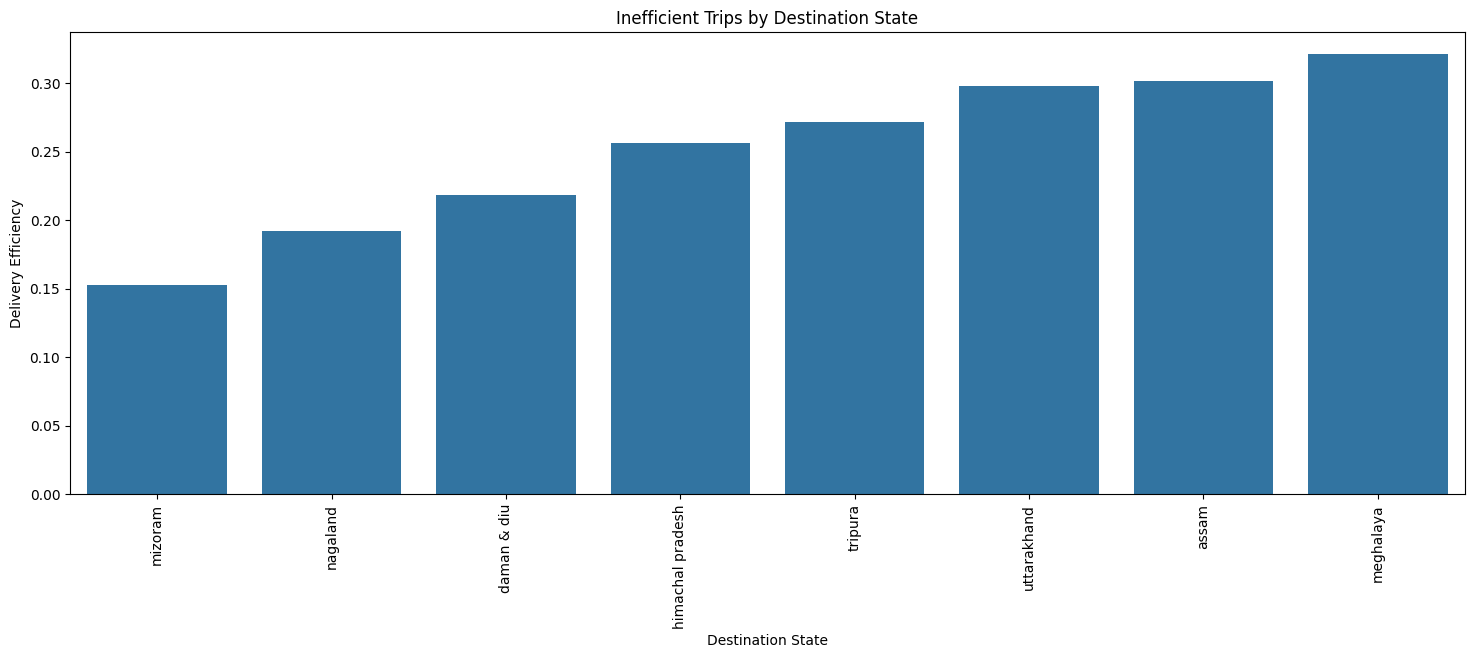

In [483]:
inefficiency_threshold = sorted_efficiency_df['delivery_efficiency'].quantile(0.25)  #bottom 25% as inefficient

inefficient_trips = sorted_efficiency_df[sorted_efficiency_df['delivery_efficiency'] < inefficiency_threshold]
inefficient_trips
plt.figure(figsize=(18, 6))
sns.barplot(x=inefficient_trips.index, y=inefficient_trips['delivery_efficiency'])
plt.xticks(rotation=90)
plt.xlabel('Destination State')
plt.ylabel('Delivery Efficiency')
plt.title('Inefficient Trips by Destination State')
plt.show()

  Mizoram, Nagaland, Assam, Meghalaya,  Daman & diu, Himachal Pradesh, Tripura destinations have low delivery efficiency

# **Identifying peak and low periods by analyzing delivery time by month**

In [459]:
finalgroup_df.groupby('trip_month')['actual_time'].mean().sort_values(ascending=False)

,actual_time
trip_month,
9,357.677811
10,346.256194


Since only two months data therefore no such peak or low periods

# **Delivery counts by city**

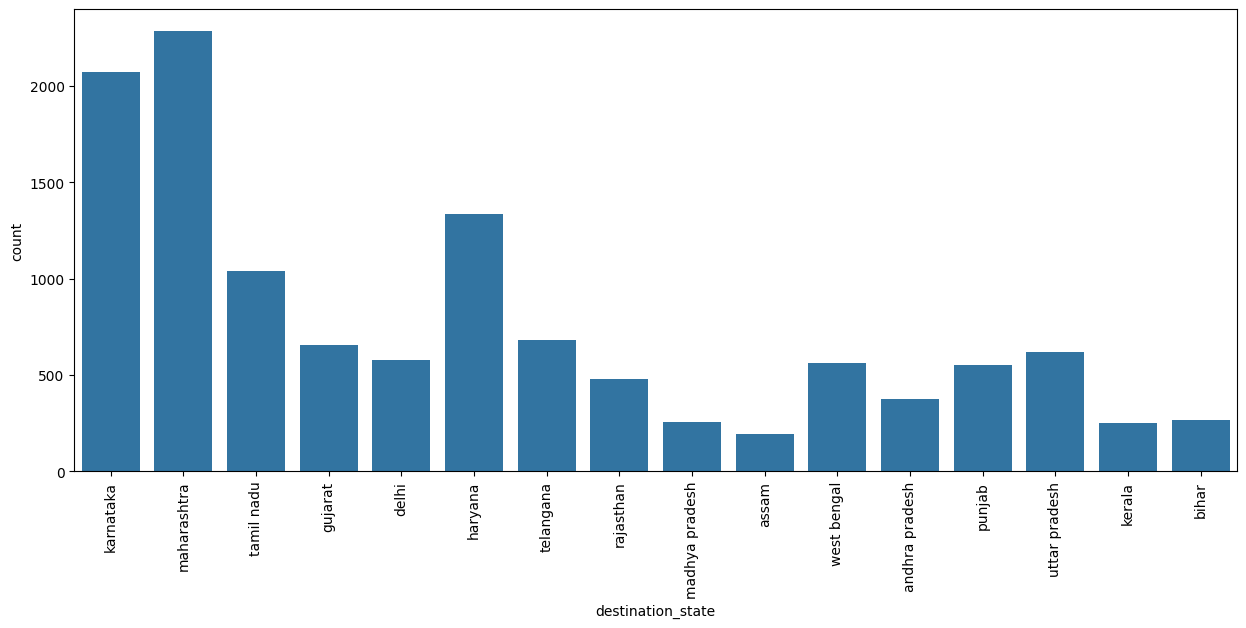

In [489]:
destination_state_counts = finalgroup_df.groupby('destination_state')['destination_state'].count().sort_values(ascending=False)

filtered_states = destination_state_counts[destination_state_counts > 150].index

filtered_df = finalgroup_df[finalgroup_df['destination_state'].isin(filtered_states)]
plt.figure(figsize=(15, 6))

sns.countplot(x='destination_state', data=filtered_df)
plt.xticks(rotation=90)
plt.show()

Karnataka and Maharashtra have highest no. of deliveries. While Assam, Kerala, Bihar, Madhya Pradesh have significantly low no. of deliveries.

<Axes: xlabel='destination_city', ylabel='count'>

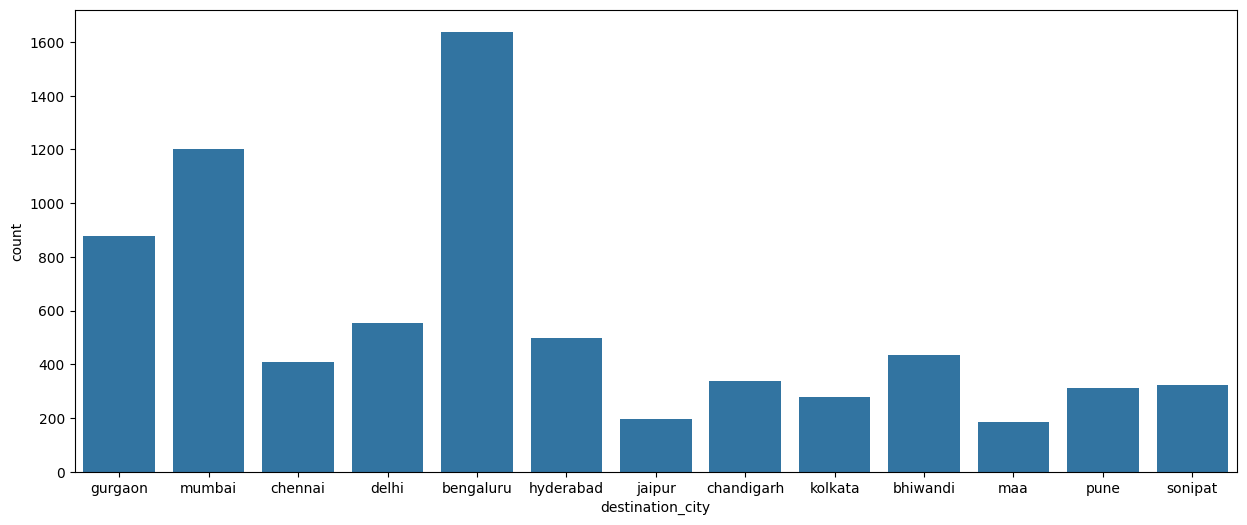

In [461]:
finalgroup_df['destination_city'] = finalgroup_df['destination_city'].astype(str)
finalgroup_df.loc[finalgroup_df['destination_city']=='bangalore', 'destination_city']='bengaluru'
finalgroup_df.loc[finalgroup_df['destination_city']=='mumbai hub', 'destination_city']='mumbai'

destination_city_counts = finalgroup_df.groupby('destination_city')['destination_city'].count().sort_values(ascending=False)

# Filter the counts to include only cities with more than 150 occurrences
filtered_cities = destination_city_counts[destination_city_counts > 150].index

filtered_df = finalgroup_df[finalgroup_df['destination_city'].isin(filtered_cities)]
plt.figure(figsize=(15, 6))

sns.countplot(x='destination_city', data=filtered_df)

Bengaluru has highest no. of deliveries & Bengaluru, Mumbai, Gurgaon have significantly high number of orders.

# **On time delivery rate**

In [462]:
finalgroup_df.loc[finalgroup_df['actual_time']<=finalgroup_df['osrm_time']]['trip_uuid'].count()/finalgroup_df['trip_uuid'].count()*100

0.6559816054642591

Only 0.65% of deliveries are on time

# **Delivery Analysis by route type**

<Axes: xlabel='route_type', ylabel='count'>

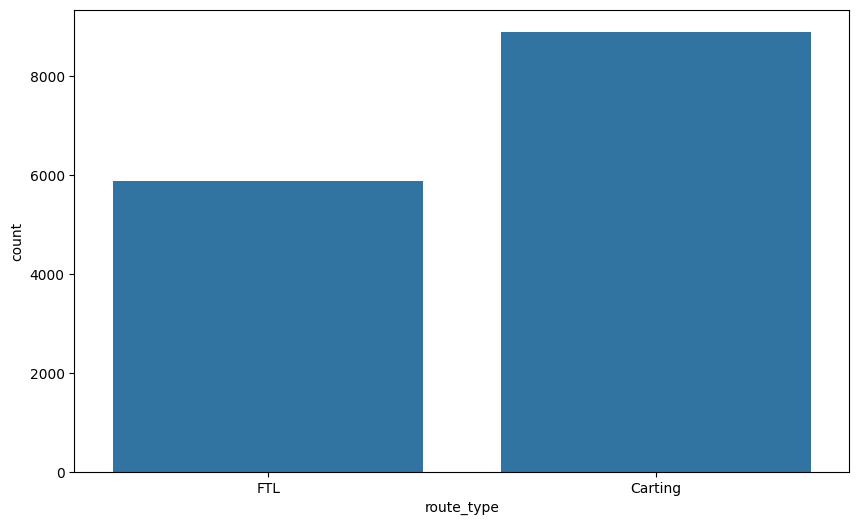

In [463]:
finalgroup_df['route_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='route_type', data=finalgroup_df)

# **which route type is more efficient**

<Axes: xlabel='route_type', ylabel='delivery_efficiency'>

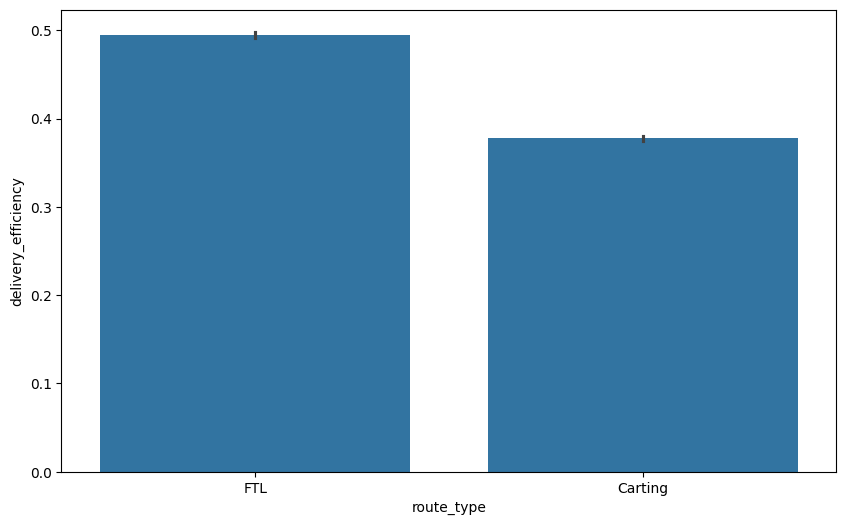

In [464]:
finalgroup_df.groupby('route_type')['delivery_efficiency'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x='route_type', y='delivery_efficiency', data=finalgroup_df)

Average delivery efficiency by Ftl route type is higher

# **Analysis between actual_time aggregated value and segment actual time aggregated value**

In [465]:
finalgroup_df[['actual_time', 'segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14782,83.0,82.0
14783,21.0,21.0
14784,282.0,281.0
14785,264.0,258.0


In [466]:
from scipy import stats
t_stat, p_value = stats.ttest_rel(df['actual_time'], df['segment_actual_time_sum'])

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between actual and segment actual times.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between actual and segment actual times.")


T-statistic: 246.5138719124651
P-value: 0.0
Reject the null hypothesis: There is a significant difference between actual and segment actual times.


There is a significant difference between actual and segment actual times.

# **Analysis between actual_time aggregated value and OSRM time aggregated value**

In [467]:
finalgroup_df[['actual_time','osrm_time']]

,actual_time,osrm_time
0,1562.0,717.0
1,143.0,68.0
2,3347.0,1740.0
3,59.0,15.0
4,341.0,117.0
...,...,...
14782,83.0,62.0
14783,21.0,12.0
14784,282.0,48.0
14785,264.0,179.0


In [468]:
# Paired t-test between actual_time and osrm_time
t_stat, p_value = stats.ttest_rel(df['actual_time'], df['osrm_time'])

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between actual and OSRM times.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between actual and OSRM times.")

T-statistic: 254.25149135773418
P-value: 0.0
Reject the null hypothesis: There is a significant difference between actual and OSRM times.


Segment times differ significantly from the overall actual times, it may indicate inefficiencies in segment-level operations.

# **Analysis between osrm distance aggregated value and segment osrm distance aggregated value**

In [469]:
finalgroup_df[['osrm_distance','segment_osrm_distance_sum']]

,osrm_distance,segment_osrm_distance_sum
0,991.3523,1320.4733
1,85.1110,84.1894
2,2354.0665,2545.2678
3,19.6800,19.8766
4,146.7918,146.7919
...,...,...
14782,73.4630,64.8551
14783,16.0882,16.0883
14784,58.9037,104.8866
14785,171.1103,223.5324


In [470]:
t_stat, p_value = stats.ttest_rel(df['osrm_distance'], df['segment_osrm_distance_sum'])

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between OSRM distance and segment OSRM distance.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between OSRM distance and segment OSRM distance.")

T-statistic: -154.82725827814107
P-value: 0.0
Reject the null hypothesis: There is a significant difference between OSRM distance and segment OSRM distance.


 There is a significant difference. There could be discrepancies in how segments are calculated or recorded.

# **Analysis between osrm time aggregated value and segment osrm time aggregated value**

In [471]:
finalgroup_df[['osrm_time','segment_osrm_time_sum']]

,osrm_time,segment_osrm_time_sum
0,717.0,1008.0
1,68.0,65.0
2,1740.0,1941.0
3,15.0,16.0
4,117.0,115.0
...,...,...
14782,62.0,62.0
14783,12.0,11.0
14784,48.0,88.0
14785,179.0,221.0


In [472]:
t_stat, p_value = stats.ttest_rel(df['osrm_time'], df['segment_osrm_time_sum'])

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between OSRM time and segment OSRM time.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between OSRM time and segment OSRM time.")

T-statistic: -161.06722278467097
P-value: 0.0
Reject the null hypothesis: There is a significant difference between OSRM time and segment OSRM time.


Segment times differ significantly from the overall OSRM time, this might indicate that there are issues with how segments are being calculated or how time is distributed across segments.

In [473]:
finalgroup_df

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek,delivery_efficiency
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,...,kanpur,central,6,2018,9,0,12,37,2,0.527998
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,doddablpur,chikadpp,d,2018,9,0,12,37,2,0.511797
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,...,gurgaon,bilaspur,hb,2018,9,0,12,37,2,0.575860
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,mumbai hub,mumbai,none,2018,9,0,12,37,2,0.291106
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,bellary,bellary,none,2018,9,0,12,37,2,0.373749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,...,chandigarh,mehmdpur,h,2018,10,23,3,40,2,0.695932
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,...,fbd,balabhgarh,dpc,2018,10,23,3,40,2,0.738752
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,kanpur,govndngr,dc,2018,10,23,3,40,2,0.137180
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,...,tirunelveli,vdkkusrt,i,2018,10,23,3,40,2,0.510318


# **Checking outliers in the numerical variables using visual analysis**

<Axes: >

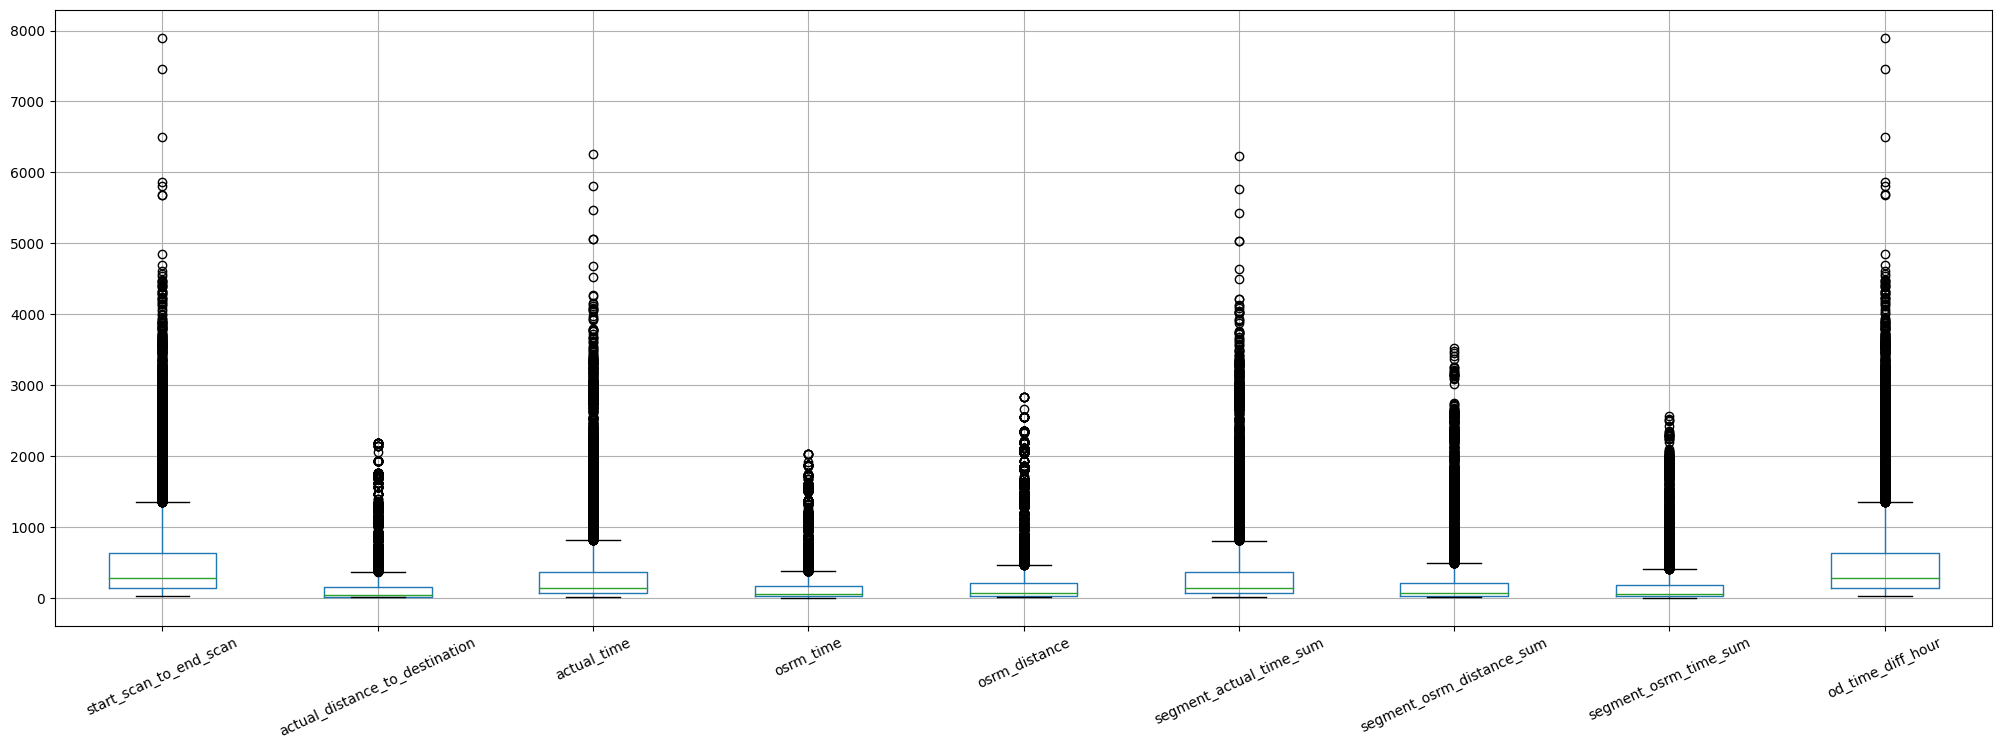

In [474]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum', 'od_time_diff_hour']
finalgroup_df[num_cols].boxplot(rot=25, figsize=(25,8))

# **Handling the outliers using the IQR method**

<Axes: >

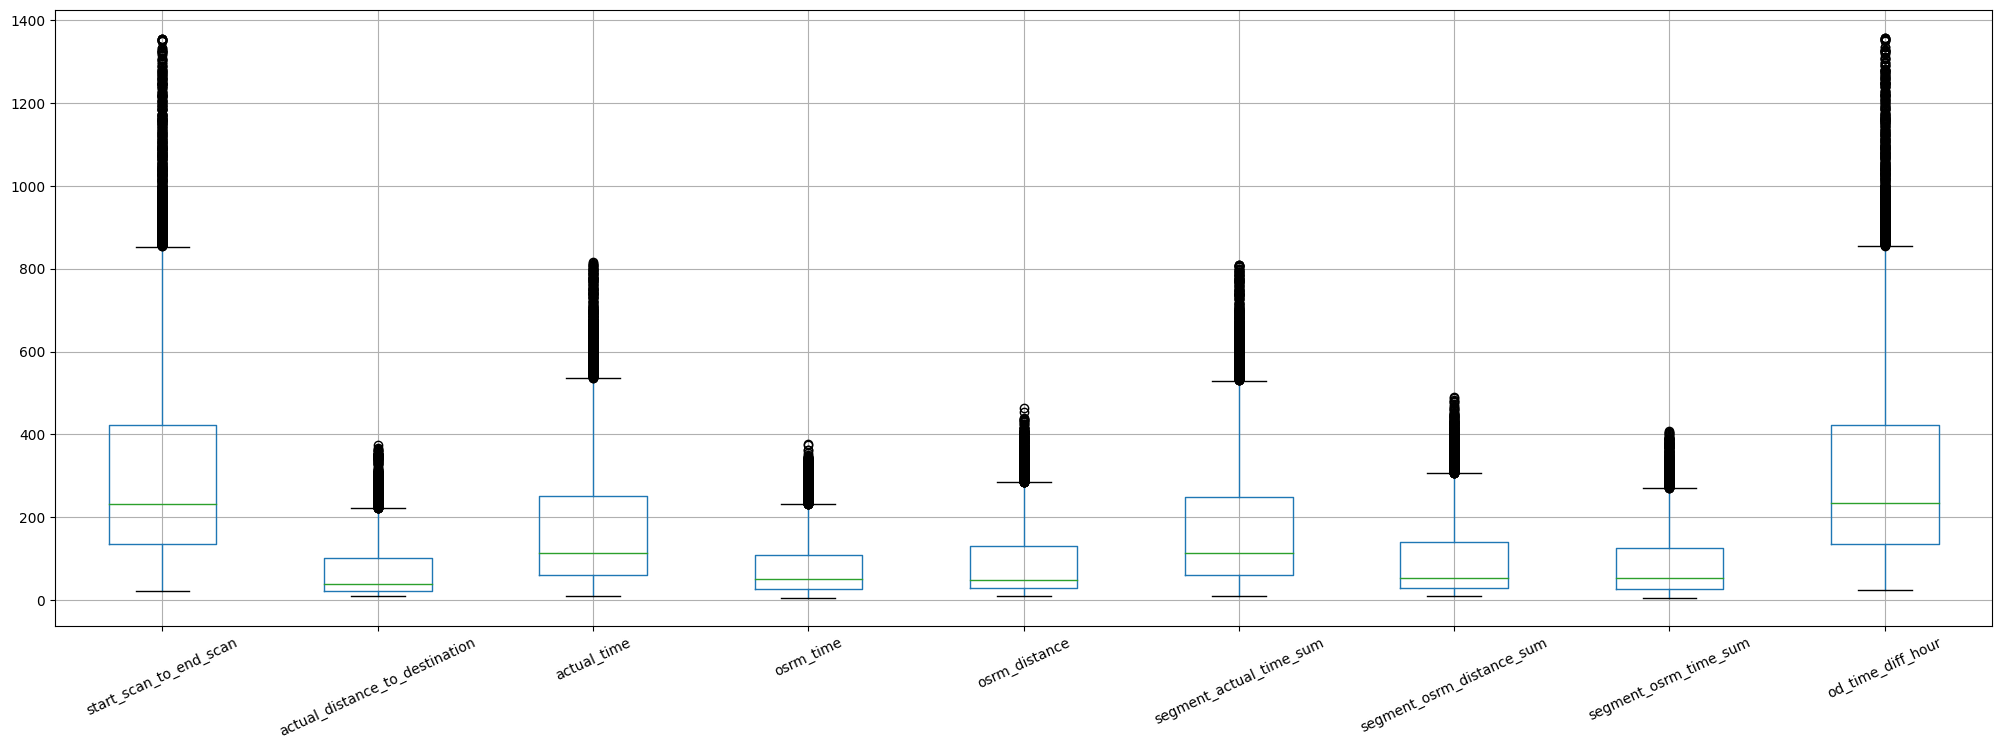

In [475]:
Q1 = finalgroup_df[num_cols].quantile(0.25)
Q3 = finalgroup_df[num_cols].quantile(0.75)

IQR = Q3 - Q1

finalgroup_df = finalgroup_df[~((finalgroup_df[num_cols] < (Q1 - 1.5 * IQR)) | (finalgroup_df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
finalgroup_df = finalgroup_df.reset_index(drop=True)
finalgroup_df[num_cols].boxplot(rot=25, figsize=(25,8))

# **Handling categorical variables using one-hot encoding**

In [476]:
finalgroup_df['route_type'].value_counts()

,count
route_type,
Carting,8812
FTL,3911


In [477]:
finalgroup_df['route_type'] = finalgroup_df['route_type'].map({'FTL':0, 'Carting':1})
finalgroup_df

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek,delivery_efficiency
0,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,1,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,doddablpur,chikadpp,d,2018,9,0,12,37,2,0.511797
1,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,1,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,mumbai hub,mumbai,none,2018,9,0,12,37,2,0.291106
2,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,0,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,bellary,bellary,none,2018,9,0,12,37,2,0.373749
3,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,1,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,...,chennai,chennai,none,2018,9,0,12,37,2,0.403230
4,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,1,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,...,chennai,chrompet,dpc,2018,9,0,12,37,2,0.379188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,1,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,...,chandigarh,mehmdpur,h,2018,10,23,3,40,2,0.695932
12719,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,1,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,...,fbd,balabhgarh,dpc,2018,10,23,3,40,2,0.738752
12720,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,1,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,kanpur,govndngr,dc,2018,10,23,3,40,2,0.137180
12721,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,1,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,...,tirunelveli,vdkkusrt,i,2018,10,23,3,40,2,0.510318


# **Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler**

In [478]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
finalgroup_df[num_cols] = scaler.fit_transform(finalgroup_df[num_cols])

In [479]:
finalgroup_df[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,-0.544839
1,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,-0.861856
2,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,1.552812
3,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,-0.510150
4,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,-0.871585
...,...,...,...,...,...,...,...,...,...
12718,-0.247231,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.349273,-0.300349,-0.246189
12719,-1.018130,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.863608,-0.941038,-1.017809
12720,0.394533,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.072932,0.026276,0.395103
12721,0.104957,0.865940,0.547267,1.390274,0.886261,0.523279,1.324267,1.697092,0.107436


In [480]:
finalgroup_df[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
count,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04
mean,-1.619566e-17,-7.371818e-17,-8.041983e-17,4.467769e-17,3.797603e-17,-3.127438e-17,-8.488760e-17,6.031487e-17,7.818595e-18
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.162918e+00,-8.785574e-01,-1.065181e+00,-1.001514e+00,-9.229378e-01,-1.061764e+00,-9.375981e-01,-1.003850e+00,-1.162915e+00
25%,-7.207269e-01,-7.065920e-01,-7.363685e-01,-7.111809e-01,-7.077649e-01,-7.371165e-01,-7.228116e-01,-7.274750e-01,-7.210516e-01
50%,-3.411472e-01,-4.689012e-01,-4.012322e-01,-3.931975e-01,-4.836339e-01,-3.997380e-01,-4.628077e-01,-4.134119e-01,-3.418602e-01
75%,4.023595e-01,4.073375e-01,4.650634e-01,4.224989e-01,4.419548e-01,4.596223e-01,4.488499e-01,4.910897e-01,4.020802e-01
max,4.049455e+00,4.178358e+00,4.031419e+00,4.113871e+00,4.150641e+00,4.037107e+00,4.130135e+00,4.046283e+00,4.050310e+00


# **Business Insights**
1. Mizoram, Nagaland, Assam, Meghalaya, Daman & diu, Himachal Pradesh, Tripura  show low delivery efficiency. These locations face operational challenges like difficult terrain, poor infrastructure, or logistical bottlenecks that hinder timely deliveries.
2. Maharashtra has the highest number of deliveries, and Maharashtra, Karnataka stand out for their significantly high order volume.
3. Assam, Kerala, Bihar, and Madhya Pradesh have significantly low numbers of deliveries could suggest several potential factors, such as lower demand, challenging infrastructure, or regional market differences.
4. Only 0.65% of deliveries are on time, which is a critical concern. This points to a systemic issue in delivery operations, either due to poor planning, misallocation of resources, or inefficient processes.
5. FTL (Full Truckload) routes have a higher average delivery efficiency compared to Carting. This indicates that FTL routes, where a truck is fully loaded and travels directly between two points, might be more streamlined. And Carting may involve multiple stops or partial loads, causing inefficiencies.
6. **Actual time vs. segment actual time:** The significant difference between these values indicates potential inefficiencies at the segment level. Delivery times for individual segments might be miscalculated or poorly planned, causing delays in overall trip times.
7. **Segment times differ from OSRM time:** This suggests that how time is distributed across segments may not align well with the calculated optimal time, indicating operational inefficiencies in segments.


# **Recommendations**
1. Conduct a detailed analysis of the regions with low delivery efficiency (such as Mizoram, Nagaland, Assam, Meghalaya, Daman & diu, Himachal Pradesh, Tripura ) to identify the root causes, whether due to external factors or internal inefficiencies in route planning or resource allocation.
2. Allocate more resources to Karnataka and Maharashtra regions to optimize delivery routes, and potentially introduce demand forecasting tools to better manage peak loads.
3. Analyze market demand, optimize routes, partner with local carriers, expand logistics hubs, and enhance brand awareness in Assam, Kerala, Bihar, and Madhya Pradesh to improve delivery efficiency and volumes.
4. Improve route optimization, real-time tracking, and communication with delivery partners. Implement a feedback loop to continuously refine operations and address delays.
5.  Focus on increasing FTL utilization where possible, as well as improving operations in carting by optimizing partial loads and intermediate stops.
6. Investigate segment-level operations to ensure that time calculations are accurate and that segments are not experiencing bottlenecks. Consider using predictive models for more accurate segment-time estimation.
7. Conduct a system audit to validate segment calculations and improve data accuracy. Ensure that segment-level data is accurately recorded and consistently matches the overall trip data.
